In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
import missingno as msno
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Data Collection

In [ ]:
dfs = pd.read_csv('/content/drive/My Drive/Colab Notebooks/glucose/small_patients.csv', low_memory=False)
dfs['id'] = dfs['id'].astype('string')
dfs['datetime'] = pd.to_datetime(dfs['datetime'], format= '%Y/%m/%d %H:%M:%S', yearfirst=True)

### Data Understanding

In [ ]:
dfs.head()

,date,time,glucose,id,datetime
0,2014-10-01,09:00:00,97.2972,glucose_07.csv,2014-10-01 09:00:00
1,2014-10-01,11:49:59,68.4684,glucose_07.csv,2014-10-01 11:49:59
2,2014-10-01,11:54:59,72.0720,glucose_07.csv,2014-10-01 11:54:59
3,2014-10-01,11:59:59,75.6756,glucose_07.csv,2014-10-01 11:59:59
4,2014-10-01,12:00:00,97.2972,glucose_07.csv,2014-10-01 12:00:00


In [ ]:
dfs.shape

(8221, 5)

In [ ]:
dfs.info

<bound method DataFrame.info of             date      time   glucose              id            datetime
0     2014-10-01  09:00:00   97.2972  glucose_07.csv 2014-10-01 09:00:00
1     2014-10-01  11:49:59   68.4684  glucose_07.csv 2014-10-01 11:49:59
2     2014-10-01  11:54:59   72.0720  glucose_07.csv 2014-10-01 11:54:59
3     2014-10-01  11:59:59   75.6756  glucose_07.csv 2014-10-01 11:59:59
4     2014-10-01  12:00:00   97.2972  glucose_07.csv 2014-10-01 12:00:00
...          ...       ...       ...             ...                 ...
8216  2014-10-04  09:00:00  100.9008  glucose_09.csv 2014-10-04 09:00:00
8217  2014-10-04  12:45:00  115.3152  glucose_09.csv 2014-10-04 12:45:00
8218  2014-10-04  16:00:00  124.3242  glucose_09.csv 2014-10-04 16:00:00
8219  2014-10-04  19:00:00  124.3242  glucose_09.csv 2014-10-04 19:00:00
8220  2014-10-05  07:00:00  154.9548  glucose_09.csv 2014-10-05 07:00:00

[8221 rows x 5 columns]>

In [ ]:
dfs.describe()

,glucose
count,8221.000000
mean,165.366929
std,76.005099
min,39.639600
25%,109.909800
50%,154.954800
75%,205.405200
max,399.999600


In [ ]:
dfs.datetime.dtype

dtype('<M8[ns]')

In [ ]:
dfs.glucose.dtype

dtype('float64')

In [ ]:
dfs.isnull().sum()

date        0
time        0
glucose     0
id          0
datetime    0
dtype: int64

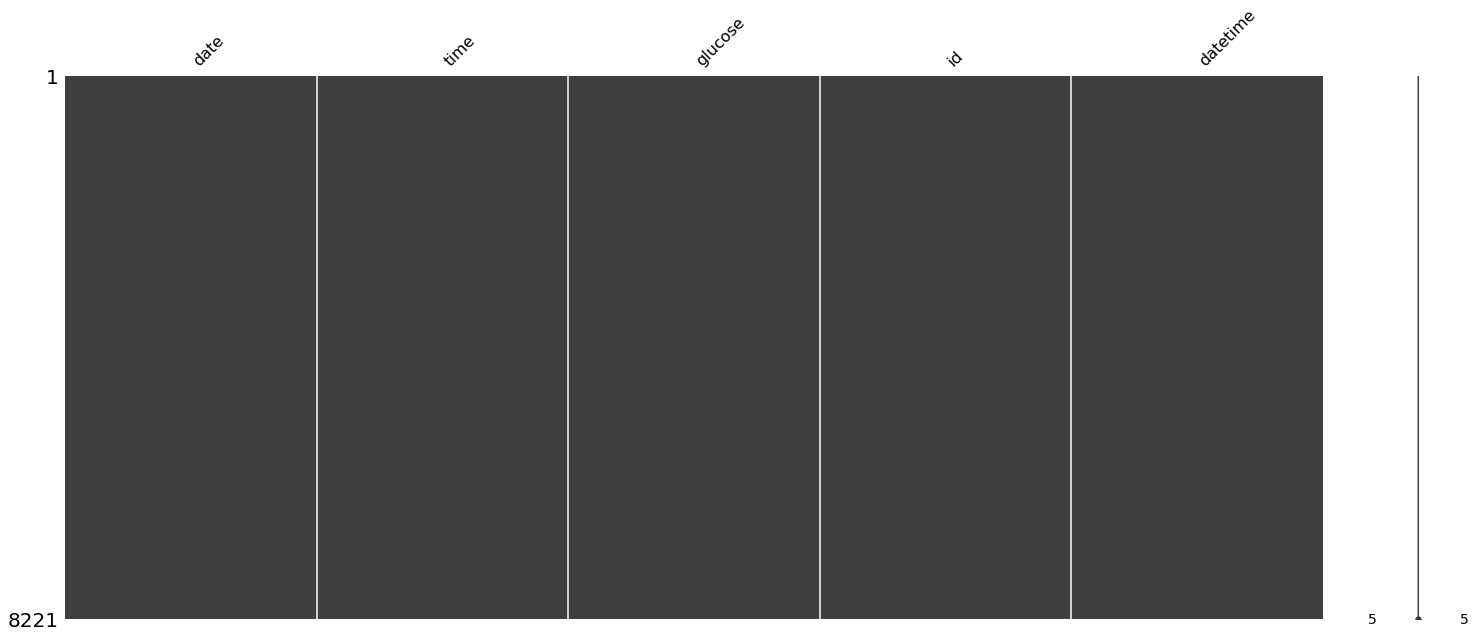

In [ ]:
msno.matrix(dfs)

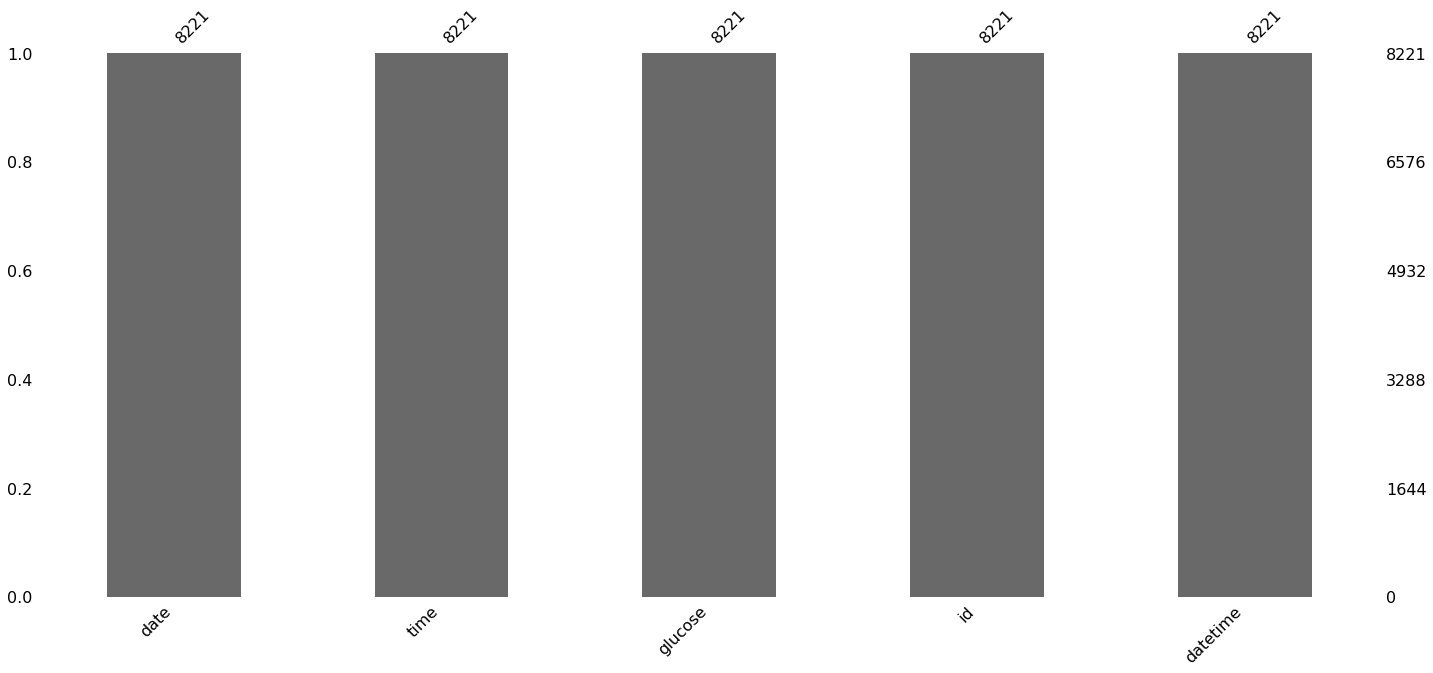

In [ ]:
msno.bar(dfs)

In [ ]:
# format records and drop nans
dfs = dfs.dropna(inplace=False, subset=['glucose'])
# drop duplicates
dfs.drop_duplicates(inplace=True)

In [ ]:
dfs.head()

,date,time,glucose,id,datetime
0,2014-10-01,09:00:00,97.2972,glucose_07.csv,2014-10-01 09:00:00
1,2014-10-01,11:49:59,68.4684,glucose_07.csv,2014-10-01 11:49:59
2,2014-10-01,11:54:59,72.0720,glucose_07.csv,2014-10-01 11:54:59
3,2014-10-01,11:59:59,75.6756,glucose_07.csv,2014-10-01 11:59:59
4,2014-10-01,12:00:00,97.2972,glucose_07.csv,2014-10-01 12:00:00


For patient glucose_07.csv the df has shape (1011, 5)
For patient glucose_06.csv the df has shape (1298, 5)
For patient glucose_05.csv the df has shape (928, 5)
For patient glucose_01.csv the df has shape (1438, 5)
For patient glucose_04.csv the df has shape (984, 5)
For patient glucose_08.csv the df has shape (1175, 5)
For patient glucose_02.csv the df has shape (1071, 5)
For patient glucose_03.csv the df has shape (185, 5)
For patient glucose_09.csv the df has shape (131, 5)


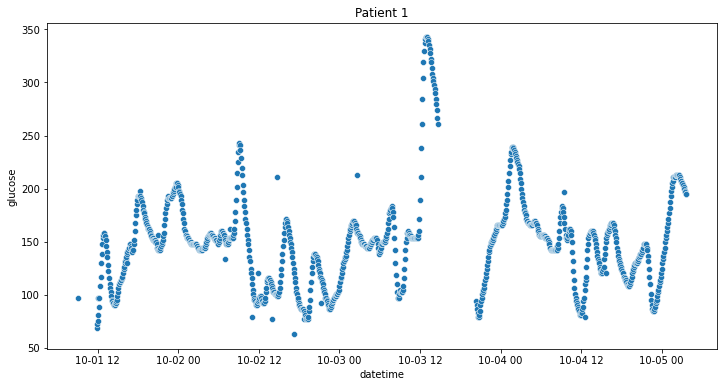

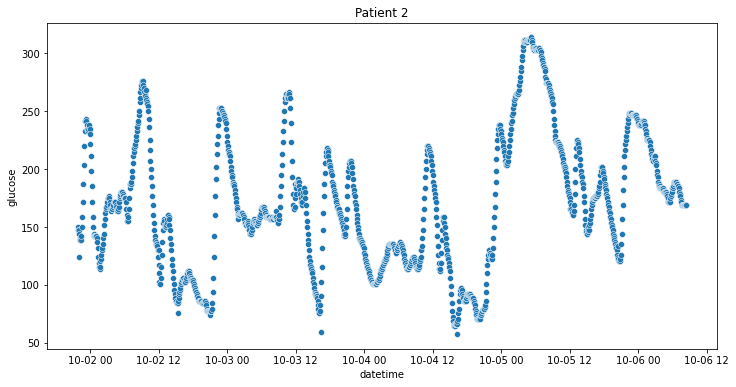

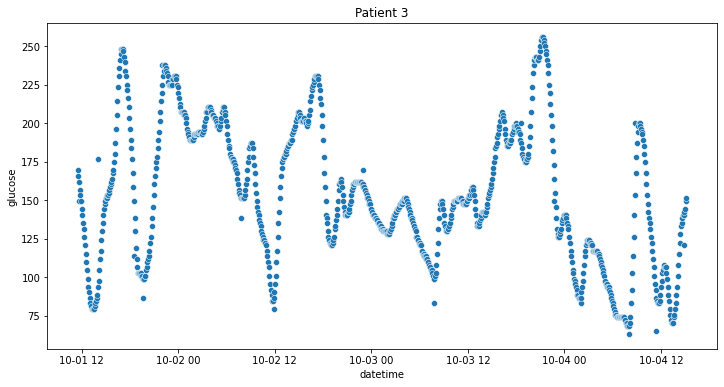

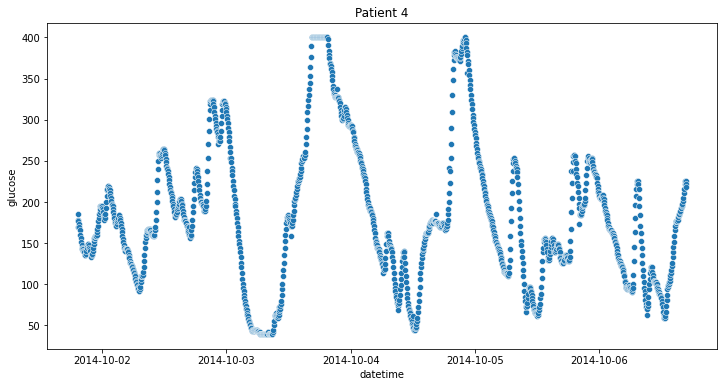

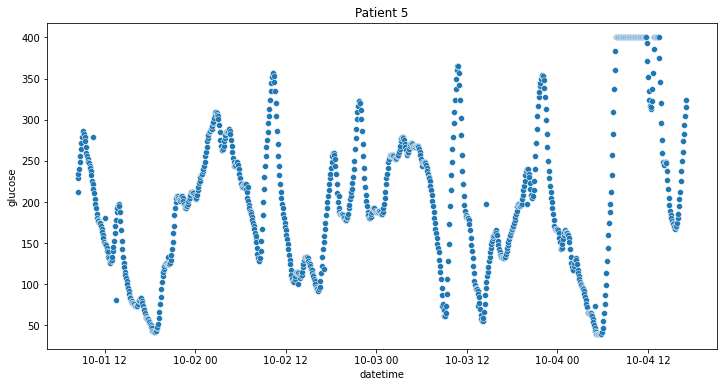

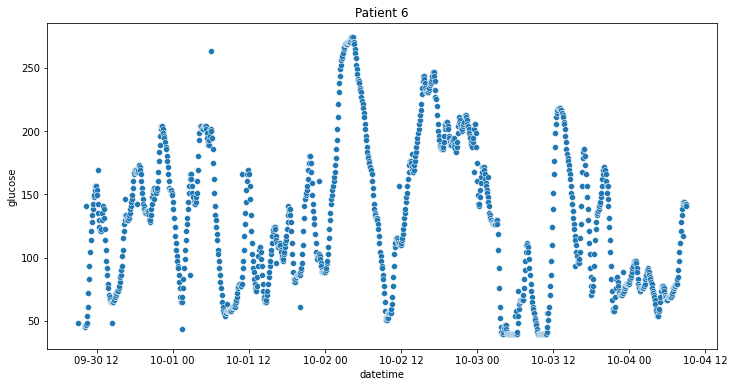

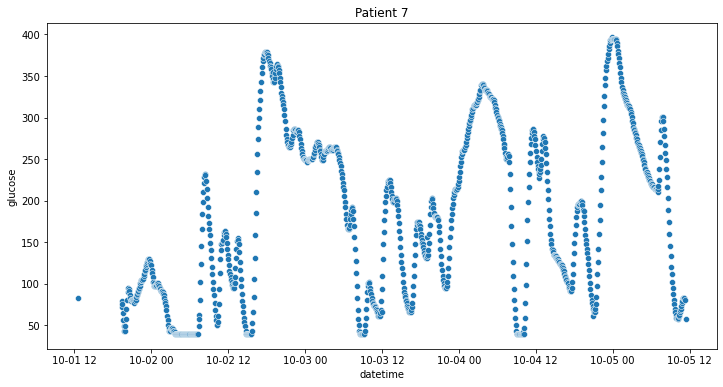

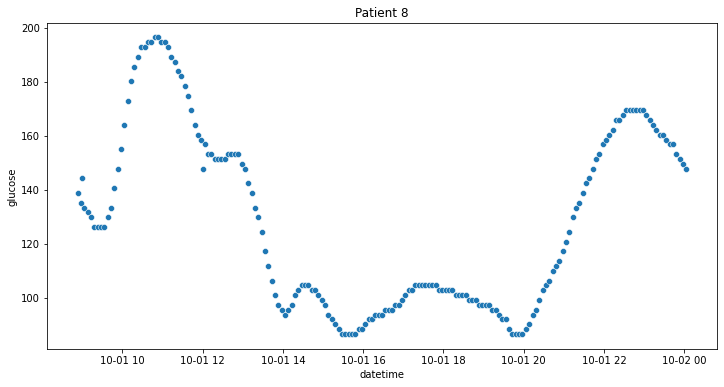

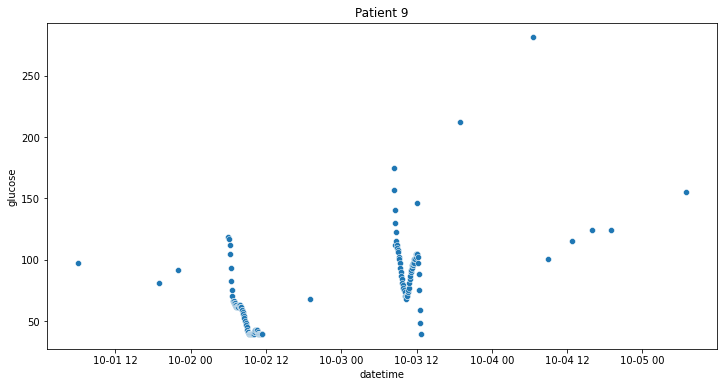

In [ ]:
#Dividir el dataframe por pacientes
patients = []
for i in dfs['id'].unique():
  x = dfs[dfs['id'] == i]
  print("For patient %s the df has shape %s" %(i, x.shape))
  patients.append(x)
#printeo cada uno de los datos de los pacientes
for i in range(9):
  plt.figure(figsize=(12, 6))
  sns.scatterplot(patients[i].datetime, patients[i].glucose)
  plt.title(f'Patient {i+1}');

In [ ]:
for i in range(9):
  patients[i] = patients[i].set_index('datetime')
  print("Patient {}:\nstart time: {}\nend time:   {}".format(i+1, patients[i].index.min(), patients[i].index.max()))
  print("--------------------------------")


Patient 1:
start time: 2014-10-01 09:00:00
end time:   2014-10-05 03:40:01
--------------------------------
Patient 2:
start time: 2014-10-01 21:50:06
end time:   2014-10-06 08:25:08
--------------------------------
Patient 3:
start time: 2014-10-01 11:30:12
end time:   2014-10-04 15:10:14
--------------------------------
Patient 4:
start time: 2014-10-01 19:14:00
end time:   2014-10-06 16:54:02
--------------------------------
Patient 5:
start time: 2014-10-01 08:24:56
end time:   2014-10-04 17:04:58
--------------------------------
Patient 6:
start time: 2014-09-30 09:00:00
end time:   2014-10-04 09:01:56
--------------------------------
Patient 7:
start time: 2014-10-01 12:30:00
end time:   2014-10-05 11:30:00
--------------------------------
Patient 8:
start time: 2014-10-01 08:53:15
end time:   2014-10-02 00:03:16
--------------------------------
Patient 9:
start time: 2014-10-01 06:00:00
end time:   2014-10-05 07:00:00
--------------------------------
